# Lab: Trees

Lab associated with Module: Trees

***

In [ ]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [ ]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [ ]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [ ]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

In [ ]:
dot

In [ ]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

This is a recursive algorithm.

In [ ]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [ ]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [ ]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting
- np.unique() function can be used to check if all the keys are unique

In [ ]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [ ]:
test3_tree = buildBinaryTree(test3)

In [ ]:

test4_tree = buildBinaryTree([3, 1, 2, 5, 4, 6, 8, 7, 9])

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

- This code does not build a balanced tree, it builds a tree that is dependent on the order of insertion

In [ ]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

In [ ]:
dot = visualize_tree(test1_tree)

In [ ]:
dot = visualize_tree(test2_tree)

In [ ]:
dot = visualize_tree(test3_tree)

In [ ]:
dot = visualize_tree(test4_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

- This code finds the key(value) in the tree and returns True if it is found, else returns False

Search operation should look like:

In [ ]:
def search(nodes, val):
    if val == nodes.val:
        return True

    if val < nodes.val:
        return False if nodes.left is None else search(nodes.left, val)
    return False if nodes.right is None else search(nodes.right, val)

In [ ]:
search(test3_tree, 3)

In [ ]:
search(test1_tree, 18)

Let us write insert function now:

**upadted code** 
- I removed redundant return statements
- Changed the **==** comaprison to **is** comparison

- The code recusrively traverses the tree and inserts the node at the appropriate location
- It finds the location by comparing the key of the node to be inserted with the key of the current node
- If the key is less than the current node, it goes to the left subtree, else it goes to the right subtree

In [ ]:
def insert(nodes, val):

    # Empty Tree
    if nodes is None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left is None: 
            nodes.left = Node(val)
        else:
            insert(nodes.left, val)
    elif nodes.right is None:
        nodes.right = Node(val)
    else:
        insert(nodes.right, val)
    return

In [ ]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

In [ ]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

- This function finds the inorder successor of the node
- This is the node with the minimum key value in the right subtree of the node to be deleted

In [ ]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes is None:  
        return nodes

    if val < nodes.val:

        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:

        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:

        # Node with only one child or no child

        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp

        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)

        nodes.val = temp.val

        nodes.right = delete(nodes.right, temp.val)

    return nodes

In [ ]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

- Test case
- Added value of 45 to the tree

In [ ]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

In [ ]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

## Strategy Design Pattern

![Class Diagram](trees-uml.png)

## Node Creation

In [99]:
from abc import ABC, abstractmethod
import numpy as np
from IPython.display import Image
from graphviz import Digraph

class Node(ABC):
    
    def __init__(self, value, parent=None):
        self.val = value
        self.right = None
        self.left = None
        self.balance_factor = 0
        self.parent = parent

class BSTNode(Node):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent

class AVLNode(Node):
    def __init__(self, value):
        super().__init__(value)
        self.balance_factor = 0

class RBNode(Node):
    def __init__(self, value):
        super().__init__(value)
        self.color = 'red' # or 'black'

## Context
**Context**: Uses a `Strategy` to execute the algorithm. It contains a reference to a Strategy object and may define an interface that lets Strategy access its data.

In [95]:
class Tree:
    def __init__(self, strategy):
        self.strategy = strategy

    def buildBinaryTree(self, data):
        return self.strategy.buildBinaryTree(data)
        
    def binaryTree(self, data, start, end, parent):
        self.strategy.binaryTree()

    def visualizeTree(self, tree):
        self.strategy.visualizeTree(tree)

    def insert(self, tree, value):
        self.strategy.insert(tree, value)

    def delete(self, tree, value):
        self.strategy.delete(tree, value)

    def findNode(self, tree, value):
        return self.strategy.findNode(tree, value)

    def search(self, tree, value):
        return self.strategy.search(tree, value)
    
    def findCommonAncestor(self, root, value1, value2):
        return self.strategy.findCommonAncestor(root, value1, value2)
    
    def checkForBalance(self, root):
        return self.strategy.checkForBalance(root)
    
    def printBalanceFactors(self, root):
        self.strategy.printBalanceFactors(root)

    def calculateBalanceFactors(self, root):
        self.strategy.calculateBalanceFactors(root)
    
    def height(self, root):
        self.strategy.height(root)
    
    def leftHeight(self, root):
        self.strategy.leftHeight(root)
    
    def rightHeight(self, root):
        self.strategy.rightHeight(root)
    
    def rotateLeft(self, root , value):
        return self.strategy.rotateLeft(root, value)
    
    def rotateRight(self, root, value):
        return self.strategy.rotateRight(root, value)
    
    def LeftRightRotation(self, root, value):
        return self.strategy.LeftRightRotation(root, value)
    
    def RightLeftRotation(self, root, value):
        return self.strategy.RightLeftRotation(root, value)

## Strategy
**Strategy**: This is an abstract class common to all supported algorithms. It declares a method for executing an algorithm.

In [96]:
class Strategy(ABC):

    @abstractmethod
    def buildBinaryTree(self, data):
        pass

    @abstractmethod
    def binaryTree(self, data, start, end, parent):
        pass

    @abstractmethod
    def visualizeTree(self, tree):
        pass

    @abstractmethod
    def insert(self, tree, value):
        pass

    @abstractmethod
    def minValueNode(self, node):
        pass

    @abstractmethod
    def delete(self, tree, value):
        pass

    @abstractmethod
    def findNode(self, tree, value):
        pass

    @abstractmethod
    def search(self, tree, value):
        pass

    @abstractmethod
    def findCommonAncestor(self, tree, value1, value2):
        pass

    @abstractmethod
    def checkForBalance(self, tree):
        pass

    @abstractmethod
    def printBalanceFactors(self, tree):
        pass

    @abstractmethod
    def calculateBalanceFactors(self, tree):
        pass

    @abstractmethod
    def height(self, root):
        pass

    @abstractmethod
    def leftHeight(self, root):
        pass

    @abstractmethod
    def rightHeight(self, root):
        pass

    @abstractmethod
    def rotateLeft(self, root, val):
        pass

    @abstractmethod
    def rotateRight(self, root, val):
        pass

    @abstractmethod
    def LeftRightRotation(self, root, val):
        pass

    @abstractmethod
    def RightLeftRotation(self, root, val):
        pass




## Concrete Strategy
**ConcreteStrategy**: This class implements the abstract `Strategy` class, providing the actual implementation for the algorithm.

In [97]:
class AVLStrategy(Strategy):
    pass
    
class RBStrategy(Strategy):
    pass

class BSTStrategy(Strategy):
   
    def buildBinaryTree(self, nodes):
        """Build a binary tree from a list of values
        Args: nodes(list): list of values
        Returns: root node of the binary tree
        """
        if len(nodes) == 0:
            raise ValueError('list is empty')
            
        return self.binaryTree(nodes, 0, len(nodes) - 1, None)


    def binaryTree(self, nodes, start, end, parent):
        """Build a binary tree from a list of values
        Args: nodes(list): list of values, start(int): start index, end(int): end index, parent(Node): parent node
        Returns: root node of the binary tree
        """
        if start > end:
            return
        
        middle = (start + end) // 2
        root = BSTNode(nodes[middle], parent)
        root.left = self.binaryTree(nodes, start, middle - 1, root)
        root.right = self.binaryTree(nodes, middle + 1, end, root)

        root.balance_factor = self.leftHeight(root) - self.rightHeight(root)
        
        return root


    def visualizeTree(self, tree):
    
        def add_nodes_edges(tree, dot=None):
            # Create Digraph object
            if dot is None:
                dot = Digraph()
                dot.node(name=str(tree), label=str(tree.val))

            # Add nodes
            if tree.left:
                dot.node(name=str(tree.left) ,label=str(tree.left.val))
                dot.edge(str(tree), str(tree.left))
                dot = add_nodes_edges(tree.left, dot=dot)
                
            if tree.right:
                dot.node(name=str(tree.right) ,label=str(tree.right.val))
                dot.edge(str(tree), str(tree.right))
                dot = add_nodes_edges(tree.right, dot=dot)

            return dot
        
        # Add nodes recursively and create a list of edges
        dot = add_nodes_edges(tree)

        # Visualize the graph
        display(dot)
    
        # return dot

    def insert(self, nodes, val):
        """Insert a value into a binary tree
        Args: nodes(node): root node of the tree, val(int): value to be inserted
        Returns: None
        """
        if nodes is None:
            nodes = Node(val)
            return

        if nodes.val == val:
            return

        if val < nodes.val:

            if nodes.left is None: 
                nodes.left = Node(val)
            else:
                insert(nodes.left, val)
        elif nodes.right is None:
            nodes.right = Node(val)
        else:
            insert(nodes.right, val)
        
        nodes.balance_factor = self.leftHeight(nodes) - self.rightHeight(nodes)
        return

    def minValueNode(self, node):
        current = node
    
        # loop down to find the leftmost leaf
        while(current.left is not None):
            current = current.left
    
        return current

    def delete(self, nodes, val):
        """Delete a value from a binary tree
        Args: nodes(node): root node of the tree, val(int): value to be deleted
        Returns: root node of the tree
        """

        if nodes is None:  
            return nodes

        if val < nodes.val:
            nodes.left = delete(nodes.left, val)

        elif val > nodes.val:
            nodes.right = delete(nodes.right, val)

        else:

            # Node with only one child or no child

            if nodes.left is None:
                temp = nodes.right
                nodes = None
                return temp
            elif nodes.right is None:
                temp = nodes.left
                nodes = None
                return temp

            # Nodes with two children: Get the inorder successor
            temp = self.minValueNode(nodes.right)
            nodes.val = temp.val
            nodes.right = delete(nodes.right, temp.val)
        
        nodes.balance_factor = self.leftHeight(nodes) - self.rightHeight(nodes)

        return nodes

    def findNode(self, tree, val):
        """Find a node with a given value
        Args: tree(node): root node of the tree, val(int): value of the node to be found
        Returns: node with the given value
        """
        if tree is None:
            return None
        if tree.val == val:
            return tree
        if tree.val > val:
            return self.findNode(tree.left, val)
        return self.findNode(tree.right, val)

    def search(self, nodes, val):
        """Search for a value in a binary tree
        Args: nodes(node): root node of the tree, val(int): value to be searched
        Returns: True if found, False if not found
        """
        if val == nodes.val:
            return True

        if val < nodes.val:
            return False if nodes.left is None else self.search(nodes.left, val)
        return False if nodes.right is None else self.search(nodes.right, val)


    def findCommonAncestor(self, nodes, val1, val2):
        """Find the common ancestor of two nodes
        Args: nodes(node): root node of the tree, val1(int): value of node 1, val2(int): value of node 2
        Returns: value of the common ancestor
        """
        if nodes is None:
            return None
        if nodes.val in [val1, val2]:
            return nodes.val
        if nodes.val > val1 and nodes.val > val2:
            return self.findCommonAncestor(nodes.left, val1, val2)
        if nodes.val < val1 and nodes.val < val2:
            return self.findCommonAncestor(nodes.right, val1, val2)
        return nodes.val




    def checkForBalance(self, nodes):
        """Check if a binary tree is balanced
        Args: nodes(node): root node of the tree
        Returns: True if balanced, False if not balanced
        """
        if nodes is None:
            return True
        if nodes.balance_factor > 1 or nodes.balance_factor < -1:
            return False
        return self.checkForBalance(nodes.left) and self.checkForBalance(nodes.right)

    def printBalanceFactors(self, nodes):
        """Print the balance factor of each node
        Args: nodes(node): root node of the tree
        Returns: None
        """
        if nodes is None:
            return
        print(
            f"node: {str(nodes.val)}, "
            f"balance factor: {str(nodes.balance_factor)}"
        )
        self.printBalanceFactors(nodes.left)
        self.printBalanceFactors(nodes.right)

    def calculateBalanceFactors(self, nodes):
        """Calculate the balance factor of each node
        Args: nodes(node): root node of the tree
        Returns: None
        """
        if nodes is None:
            return
        nodes.balance_factor = self.leftHeight(nodes) - self.rightHeight(nodes)
        self.calculateBalanceFactors(nodes.left)
        self.calculateBalanceFactors(nodes.right)

    def height(self, root):
        """Calculate the height of a tree
        Args: root(node): root node of the tree
        Returns: height(int): height of the tree
        """
        return 0 if root is None else max(self.height(root.left), self.height(root.right)) + 1

    def leftHeight(self, root):
        return self.height(root.left)

    def rightHeight(self, root):
        return self.height(root.right)

    def rotateLeft(self, root, val):
        """Left rotate a subtree
        Args: tree(node): root node of the tree, val(int): value of the node to be rotated
        Returns: root node of the subtree
        """
        node = self.findNode(root, val)
        if node is None or node.right is None:
            return root
        temp = node.right
        node.right = temp.left
        if node.right:  # Update parent pointer for the right child of the rotated node
            node.right.parent = node
        temp.left = node
        if node.parent is not None:
            if node.parent.left == node:
                node.parent.left = temp
            else:
                node.parent.right = temp
        temp.parent = node.parent
        node.parent = temp

        node.balance_factor = self.leftHeight(node) - self.rightHeight(node)

        return temp if temp.parent is None else root

    def rotateRight(self, root, val):
        """Right rotate a subtree
        Args: tree(node): root node of the tree, val(int): value of the node to be rotated
        Returns: root node of the subtree
        """
        node = self.findNode(root, val)
        if node is None or node.left is None:
            return root
        temp = node.left
        node.left = temp.right
        if node.left:  # Update parent pointer for the left child of the rotated node
            node.left.parent = node
        temp.right = node
        if node.parent is not None:
            if node.parent.left == node:
                node.parent.left = temp
            else:
                node.parent.right = temp
        temp.parent = node.parent
        node.parent = temp

        node.balance_factor = self.leftHeight(node) - self.rightHeight(node)

        return temp if temp.parent is None else root

    def LeftRightRotation(self, root, val):
        """Left right rotate a subtree
        Args: tree(node): root node of the tree, val(int): value of the node to be rotated
        Returns: root node of the subtree
        """
        node = self.findNode(root, val)
        if node is None or node.left is None or node.left.right is None:
            return root
        
        # Perform the left-right rotation operation
        A = node
        B = node.left
        C = node.left.right
        D = C.left
        E = C.right
        
        # Update the subtree
        if A.parent is not None:
            if A.parent.left == A:
                A.parent.left = C
            else:
                A.parent.right = C
        C.parent = A.parent
        C.left = B
        B.parent = C
        C.right = A
        A.parent = C
        B.right = D
        if D is not None:
            D.parent = B
        A.left = E
        if E is not None:
            E.parent = A
        A.balance_factor = self.leftHeight(A) - self.rightHeight(A)
        B.balance_factor = self.leftHeight(B) - self.rightHeight(B)
        C.balance_factor = self.leftHeight(C) - self.rightHeight(C)

        return C if C.parent is None else root

    def RightLeftRotation(self, root, val):
        """Right left rotate a subtree
        Args: tree(node): root node of the tree, val(int): value of the node to be rotated
        Returns: root node of the subtree
        """
        node = self.findNode(root, val)
        if node is None or node.right is None or node.right.left is None:
            return root
        
        # Perform the right-left rotation operation
        A = node
        B = node.right
        C = node.right.left
        D = C.left
        E = C.right
        
        # Update the subtree
        if A.parent is not None:
            if A.parent.left == A:
                A.parent.left = C
            else:
                A.parent.right = C
        C.parent = A.parent
        C.left = A
        A.parent = C
        C.right = B
        B.parent = C
        A.right = D
        if D is not None:
            D.parent = A
        B.left = E
        if E is not None:
            E.parent = B
        A.balance_factor = self.leftHeight(A) - self.rightHeight(A)
        B.balance_factor = self.leftHeight(B) - self.rightHeight(B)
        C.balance_factor = self.leftHeight(C) - self.rightHeight(C)
        
        return C if C.parent is None else root

## Testing

node: 5, balance factor: 0
node: 2, balance factor: -1
node: 1, balance factor: 0
node: 3, balance factor: -1
node: 4, balance factor: 0
node: 8, balance factor: 0
node: 6, balance factor: -1
node: 7, balance factor: 0
node: 9, balance factor: -1
node: 10, balance factor: 0
Check for Balanced Tree: True
Common Ancestor of 7 and 10 is: 8


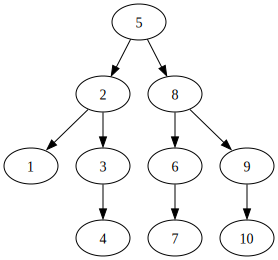

Deleted node 5
Inserted node 4.5
node: 6, balance factor: 1
node: 2, balance factor: -2
node: 1, balance factor: 0
node: 3, balance factor: -2
node: 4, balance factor: -1
node: 4.5, balance factor: 0
node: 8, balance factor: -1
node: 7, balance factor: 0
node: 9, balance factor: -1
node: 10, balance factor: 0
Check for Balanced Tree: False


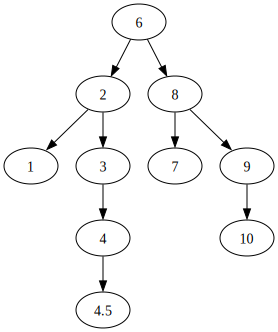

node: 3, balance factor: 2
node: 1, balance factor: -1
node: 2, balance factor: 0


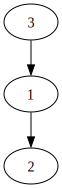

Left-Right Rotation
node: 2, balance factor: 0
node: 1, balance factor: 0
node: 3, balance factor: 0


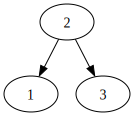

node: 1, balance factor: -2
node: 3, balance factor: 1
node: 2, balance factor: 0


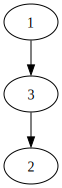

Right-Left Rotation
node: 2, balance factor: 0
node: 1, balance factor: 0
node: 3, balance factor: 0


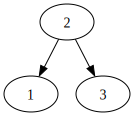

In [100]:
bst_strategy = BSTStrategy()

context = Tree(bst_strategy)

treeData = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

root = context.buildBinaryTree(treeData)

context.calculateBalanceFactors(root)

context.printBalanceFactors(root)

print(f"Check for Balanced Tree: {context.checkForBalance(root)}")

print(f"Common Ancestor of 7 and 10 is: {context.findCommonAncestor(root, 7, 10)}")

context.visualizeTree(root)

print("Deleted node 5")

context.delete(root, 5)

print("Inserted node 4.5")

context.insert(root, 4.5)


root = context.rotateLeft(root, 5)

context.calculateBalanceFactors(root)

context.printBalanceFactors(root)

print(f"Check for Balanced Tree: {context.checkForBalance(root)}")

context.visualizeTree(root)


def create_unbalanced_tree():
    root = Node(3)
    root.left = Node(1, root)
    root.left.right = Node(2, root.left)
    return root

ubTree1 = create_unbalanced_tree()

context.calculateBalanceFactors(ubTree1)

context.printBalanceFactors(ubTree1)

context.visualizeTree(ubTree1)

ubTree1 = context.LeftRightRotation(ubTree1, 3)

print("Left-Right Rotation")

context.calculateBalanceFactors(ubTree1)

context.printBalanceFactors(ubTree1)

context.visualizeTree(ubTree1)

def create_unbalanced_tree():
    root = Node(1)
    root.right = Node(3, root)
    root.right.left = Node(2, root.right)

    return root

ubTree2 = create_unbalanced_tree()

context.calculateBalanceFactors(ubTree2)

context.printBalanceFactors(ubTree2)

context.visualizeTree(ubTree2)

print("Right-Left Rotation")

ubTree2 = context.RightLeftRotation(ubTree2, 1)

context.calculateBalanceFactors(ubTree2)

context.printBalanceFactors(ubTree2)

context.visualizeTree(ubTree2)